# **Sneezy defeating Google Recaptcha**






## Task

Thema: Eine interessante und lehrreiche Datenanalyse auf einem von Ihnen wählbaren Datenset

Einschränkung: Keines der "klassischen" Datensets aus scikit-learn oder Keras.
Die Arbeit soll Ihre Kompetenzen im Bereich Maschinelles Lernen demonstrieren.
Die Arbeit soll die Bereiche "Domainverständnis", "Datenvorverarbeitung", "Analyse" und "Visualisierung" abdecken.
Sie können sich an anderen Arbeiten orientieren, müssen das Gelernte dann aber auf Ihren gewählten Analysegegenstand übertragen.
Verwendete Quellen müssen im Notebook angegeben werden.
Format: Ein vollständiges und in sich abgeschlossenes Jupyter Notebook

Das vollständig ausgeführte Jupyter Notebook ist zusätzlich auch als PDF-Datei einzureichen.
Falls die analysierten Daten zu umfangreich sind um sie mitabzugeben, reicht ein Link auf das Datenset.
Gruppengröße: 4 Personen (in Sonderfällen 3 Personen)

Bearbeitungszeitraum: **16.08 - 08.09.2023**

**23.08: Einreichung einer Projektskizze** (ca. eine DIN A4-Seite): untersuchte Daten, gewählte Fragestellung, geplantes Vorgehen, Aufgabenverteilung in der Gruppe

**30.08: Abgabe eines Zwischenstands** (lauffähiges Jupyter Notebook) und eines Zwischenberichts (ca. eine DIN A4-Seite): erreichter Stand, aufgetretene Herausforderungen, begründete Abweichungen von der Projektskizze

**08.09: Abgabe der finalen Version (vollständiges Jupyter Notebook + Erklärung)**
Erklärung: Unterschriebene Eigenständigkeitserklärung + Aufschlüsselung der Arbeitsaufteilung innerhalb der Gruppe (Hauptverantwortlichkeiten für Bestandteile + individueller Beitrag in Prozent der Gesamtleistung)

Arbeitsumfang: 40 - 50 Arbeitsstunden pro Person

Bewertungskriterien laut Masterhausarbeitsvorlage:

Gliederung der Arbeit / Aufbau und Darstellung der Problemstellung / Systematik / Struktur ("roter Faden")
Wissenschaftlichkeit / Inhaltliche Vollständigkeit und Richtigkeit / Themenrelevanz / Quellenarbeit / Eigenleistung
Klarheit der Darstellung & Stringenz der Argumentationskette / formale Korrektheit / Rechtschreibung / Schreibstil
Zielpublikum: Studierende Ihres Studiengangs

Fokus: Demonstration Ihrer Kompetenzen + Wissensvermittlung (das konkrete Analyseergebnis ist nachrangig)

## Projektskizze

### Google reCAPTCHA V2


#### Hintergrund und Kontext

[Google reCAPTCHA](https://developers.google.com/recaptcha/docs/display) ist ein Sicherheitswerkzeug, das entwickelt wurde, um zwischen menschlichen Benutzern und Bots zu unterscheiden und so Missbrauch und Cyberangriffe zu verhindern. Die Version, reCAPTCHA V2, stellt Benutzern Herausforderungen wie die Identifizierung von Objekten in Bildern. Das Umgehen dieser Sicherheitsmaßnahme mittels maschinellen Lernens und tiefen neuronalen Netzen ist sowohl technisch als auch wissenschaftlich interessant, da es die Leistungsfähigkeit dieser Modelle testet und gleichzeitig zur Verbesserung der Sicherheit von CAPTCHA-Systemen beitragen kann.

#### Fragestellungen und Ziele

Zu welcher Genauigkeit können derzeit Modelle mittels Verfahren des maschinellen Lernens optimiert werden, um in der Anwendung Google’s Recaptha V2 Bilder korrekt zu klassifizieren?

- Welche Veränderung der Modellgüte kann mit aktuellen Methoden der Vorverarbeitung und der Datenaugmentierung aus Forschung und Praxis erzielt werden?

- Was sind die neuesten Entwicklungen (State-of-the-Art) in der Bildverarbeitung mit maschinellem Lernen, insbesondere bei der Verwendung von tiefen neuronalen Netzen wie Inceptionv3?  

- Welche in der Forschung bestehenden Metriken zur Klassifikation eignen sich zur Lösung des oben beschriebenen Anwendungsfalls?

#### Geplantes Vorgehen und Aufgabenverteilung

- Explorative Datenanalyse (EDA): Untersuchung der Daten durch Visualisierungen und deskriptive Statistiken, um erste Einblicke zu gewinnen. (Hauptverantwortlich: Rares, Niklas)

- Datenvorbereitung: Erstellen eines geeigneten Datensatzes durch Resizing, Resampling und extrahieren von Labels aus der Ordnerstruktur (Paarprogrammierung)

- Modellierung: Auswahl und Anwendung geeigneter statistischer Modelle oder Algorithmen zur Beantwortung der Fragestellung. (Hauptverantwortlich: Leon)

- Ergebnisse und Interpretation: Analyse der Ergebnisse der Modelle, Interpretation der Befunde und Vergleich mit bestehenden Theorien. (Paarprogrammierung)

- Berichterstattung: Erstellung eines detaillierten Berichts, der die Ergebnisse zusammenfasst und Empfehlungen basierend auf den Befunden gibt. (Paarprogrammierung)

Das Projekt wird im Google Colab1 entwickelt.

#### Literatur und Quellen

Dataset: https://www.kaggle.com/datasets/cry2003/google-recaptcha-v2-images

Notebook – InceptionV3: https://www.kaggle.com/code/ahmedhossam666/google-recapthca

ResNet Paper: https://arxiv.org/abs/1512.03385

Google RecapthaV2: https://developers.google.com/recaptcha/docs/display

## Experimentparameter

Datenparameter (2 Ausprägungen)
- Methoden zur Qualitätsverbesserung von Bilddatensätzen
  - Data Augmentation (Ohne, Mit (0.05, 0.05, True))
    - Zoom (Begründen dass dadurch relevante inhalte fehlen können (Ampel))
    - Kontrast
      - 0.05
    - Helligkeit
      - 0.05
    - horizontale Spiegelung
      - horizontale Spiegelung

Trainingsparameter (3 Ausprägungen)
- Verwendete neuronale Netzarchitekturen
  - ResNet50V2
  - TBD - weiteres aktuelles vortrainiertes Modell über keras.applications
  - LeNet 5 Architecture (built from Scratch)

- Untersuchte Metriken (TBD)
  - Accuracy
  - f1-score
  - Precision
  - Recall

  Insgesamt ergeben sich 2 * 3 = 6 zu untersuchende Kombinationen

## 0. Unterstützende Funktionen

In [2]:
""" This module defines the logging component."""
import logging


def create_logger(log_level: str, logger_name: str = "custom_logger"):
    """Create a logging based on logger.

    Args:
        log_level (str): Kind of logging
        logger_name (str, optional): Name of logger

    Returns:
        logger: returns logger
    """
    logger = logging.getLogger(logger_name)
    logger.setLevel(logging.DEBUG)  # Set the base logging level to the lowest (DEBUG)

    # If logger already has handlers, don't add a new one
    if logger.hasHandlers():
        logger.handlers.clear()

    # Create a console handler and set the level based on the input
    console_handler = logging.StreamHandler()
    if log_level == "DEBUG":
        console_handler.setLevel(logging.DEBUG)
    elif log_level == "INFO":
        console_handler.setLevel(logging.INFO)
    elif log_level == "WARNING":
        console_handler.setLevel(logging.WARNING)
    elif log_level == "ERROR":
        console_handler.setLevel(logging.ERROR)
    else:
        raise ValueError("Invalid log level provided")

    # Create a formatter and set it for the console handler
    formatter = logging.Formatter(
        "%(asctime)s - %(levelname)s - %(message)s",
        datefmt="%Y-%m-%d %H:%M:%S",
    )
    console_handler.setFormatter(formatter)

    # Add the console handler to the logger
    logger.addHandler(console_handler)

    return logger

In [3]:
logger = create_logger(
    log_level="INFO",
    logger_name=__name__,
)

## 1. Laden der Daten

Google Drive in Google Colab-Notebook einbinden


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Erstelle einen Ordner auf deinem lokalen Laufwerk und navigiere hinein


In [ ]:
# import os
# file_path = '/content/drive/MyDrive/MADS2400'
# if os.path.isdir(file_path):
#   %cd /content/drive/MyDrive/MADS2400
# else:
#   %mkdir /content/drive/MyDrive/MADS2400
#   %cd /content/drive/MyDrive/MADS2400

Liste alle Dateien in dem Ordner auf


In [ ]:
%ls -a

Durch die Nutzung eines Tokens wird der Datensatz lokal auf dem Google Drive kopiert.

In [ ]:
%%capture
!conda install python-dotenv

In [4]:
# TODO: refactor this cell so that there is no error occuring in the output
import os
from dotenv import load_dotenv
load_dotenv()

load_path = 'Google-Recaptcha-V2-Images'

if not os.path.isdir('/content/drive/MyDrive/MADS2400/Google-Recaptcha-V2-Images') or not os.path.isdir(load_path):
  git_fine_grained_token = os.environ["git_fine_grained_token"]
  username = 'RaresMihai11'
  repository = 'Google-Recaptcha-V2-Images'
  !git clone https://{git_fine_grained_token}@github.com/{username}/{repository}
else:
  logger.info("already cloned image repository")

KeyError: 'git_fine_grained_token'

Liste alle Dateien auf und navigiere in den Ordner Google-Recaptcha-V2-Images

In [5]:
%ls -a
%cd Google-Recaptcha-V2-Images

./                                     README.md
../                                    Sneezy.ipynb
.git/                                  example.env
.gitignore                             load_data.py
Google-Recaptcha-V2-Images/            logs/
Install-TensorFlow-on-Mac-M1-GPU-main/ models/
MADS2400/
/Users/rares/Documents/NAK-ML/Google-Recaptcha-V2-Images


/opt/anaconda3/envs/nak_ml/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


List all the files and navigate into Bicycle folder

In [6]:
%ls

Bicycle/    Car/        Hydrant/    Other/      Stair/
Bridge/     Chimney/    Motorcycle/ Palm/       TLight/
Bus/        Crosswalk/  Mountain/   README.md


## 2. Explorative Datenanalyse


### 2.1 Verzeichnisstruktur und Dateianzahl
Nach dem erfolgreichen Transfer der Daten auf das lokale Laufwerk ist der erste Schritt die Untersuchung der Verzeichnisstruktur und der Dateianzahl. Dies ermöglicht einen Überblick über die Organisation und die Verteilung der Daten innerhalb der verschiedenen Ordner.


In [7]:
import os
from PIL import Image

main_dir = '../Google-Recaptcha-V2-Images/'
folders = ["Bicycle", "Bus", "Chimney", "Hydrant", "Mountain", "Palm", "Stair",
           "Bridge", "Car", "Crosswalk", "Motorcycle", "Other", "TLight"]

folder_image_data = {}

for folder in folders:

    folder_path = os.path.join(main_dir, folder)

    if os.path.isdir(folder_path):
        image_files = []

        for file_name in os.listdir(folder_path):
            if file_name.lower().endswith(('png', 'jpg', 'jpeg')):
                file_path = os.path.join(folder_path, file_name)

                with Image.open(file_path) as img:
                    img_format = img.format
                    image_files.append({
                        'image': img.copy(),
                        'format': img_format
                    })
                    
        folder_image_data[folder] = {
            "count": len(image_files),
            "images": image_files
        }

        print(f'{folder}: {len(image_files)} Bilder')

Bicycle: 1656 Bilder
Bus: 7166 Bilder
Chimney: 265 Bilder
Hydrant: 6009 Bilder
Mountain: 19 Bilder
Palm: 1648 Bilder
Stair: 433 Bilder
Bridge: 1278 Bilder
Car: 6123 Bilder
Crosswalk: 2056 Bilder
Motorcycle: 196 Bilder
Other: 2614 Bilder
TLight: 2802 Bilder


### 2.2 Klassenverteilung
Die Anzahl der Bilder in jeder Klasse wurde überprüft und im Balkendiagramm dargestellt. Es ist zu erkennen, dass der Datensatz nicht ausgeglichen ist. Das kann zu einem Bias im Modell führen und die Modellleistung beeinträchtigen.

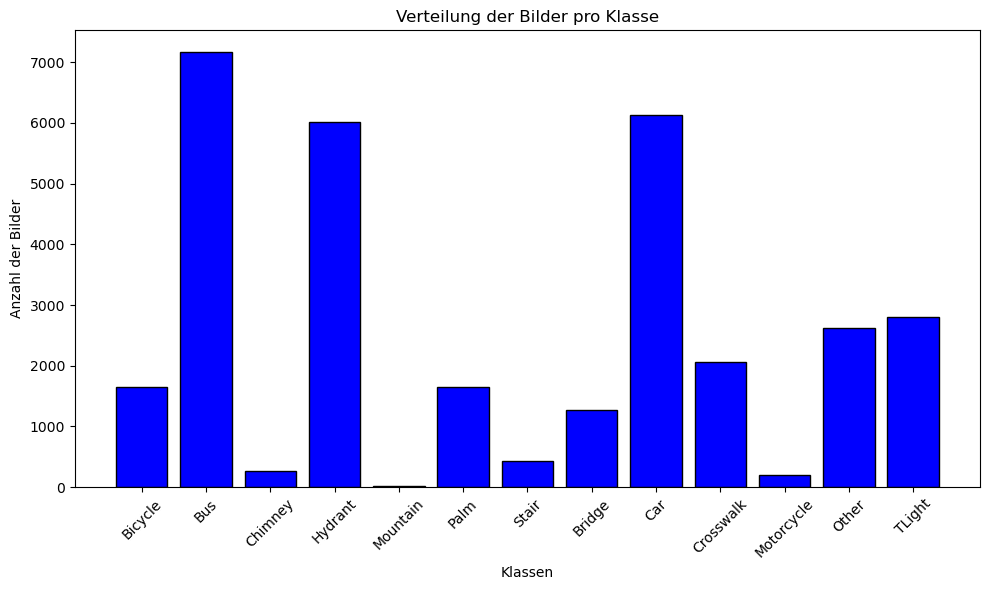

In [8]:
import matplotlib.pyplot as plt

folders = folder_image_data.keys()
values = [folder['count'] for folder in folder_image_data.values()]

plt.figure(figsize=(10, 6))
plt.bar(folders, values, color='blue', edgecolor='black')
plt.xlabel('Klassen')
plt.ylabel('Anzahl der Bilder')
plt.title('Verteilung der Bilder pro Klasse')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 2.3 Dateiendungen prüfen und Konvertierung in JPG
Die Verteilung der Bildformate (z.B. PNG, JPG) wurde untersucht, um sicherzustellen, dass alle Formate berücksichtigt werden. Eine dritte Kategorie für alle anderen Dateiendungen wurde erstellt.

Die Bildformate JPG und PNG weisen zum Beispiel unterschiedliche Eigenschaften auf, insbesondere in Bezug auf die Kanäle (Channels), die sie verwenden. Daher wird auf ein Format konvertiert.

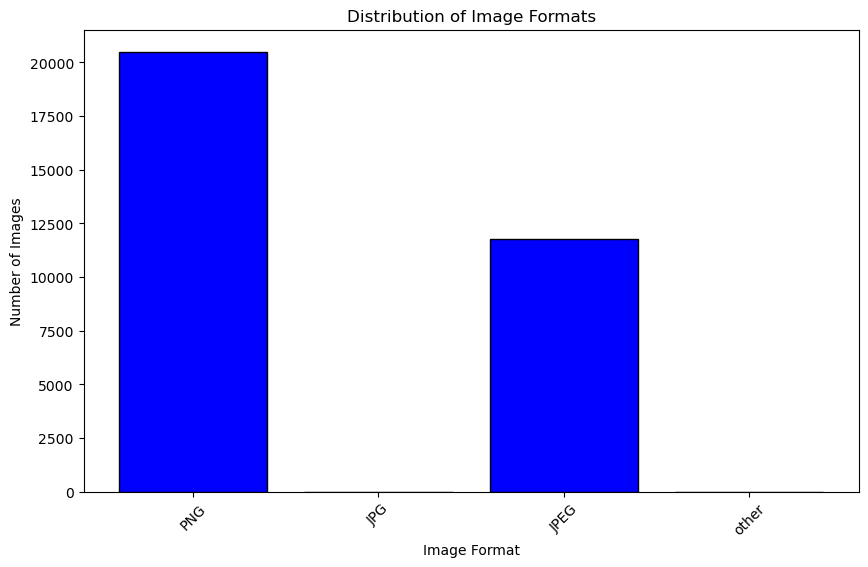

In [9]:
import matplotlib.pyplot as plt

def check_file_types():
  file_format_counts = {'PNG': 0, 'JPG': 0, 'JPEG': 0, 'other': 0}

  for folder, data in folder_image_data.items():
      for img in data['images']:
          img_format = img['format'] if img['format'] else 'other'

          if img_format in file_format_counts:
              file_format_counts[img_format] += 1
          else:
              file_format_counts['other'] += 1

  plt.figure(figsize=(10, 6))
  plt.bar(file_format_counts.keys(), file_format_counts.values(), color='blue', edgecolor='black')
  plt.xlabel('Image Format')
  plt.ylabel('Number of Images')
  plt.title('Distribution of Image Formats')
  plt.xticks(rotation=45)
  plt.show()

check_file_types()

In [10]:
import matplotlib.pyplot as plt

count = 0
for folder, data in folder_image_data.items():
    converted_images = []

    for img in data['images']:
        if img['format'] == 'PNG':
            count += 1
            img_rgb = img['image'].convert('RGB')
            converted_images.append({'image': img_rgb, 'format': 'JPEG'})
        else:
            converted_images.append(img)

    folder_image_data[folder]['images'] = converted_images

logger.info(f"Converted images: {count}")

2024-09-04 16:47:31 - INFO - Converted images: 20503


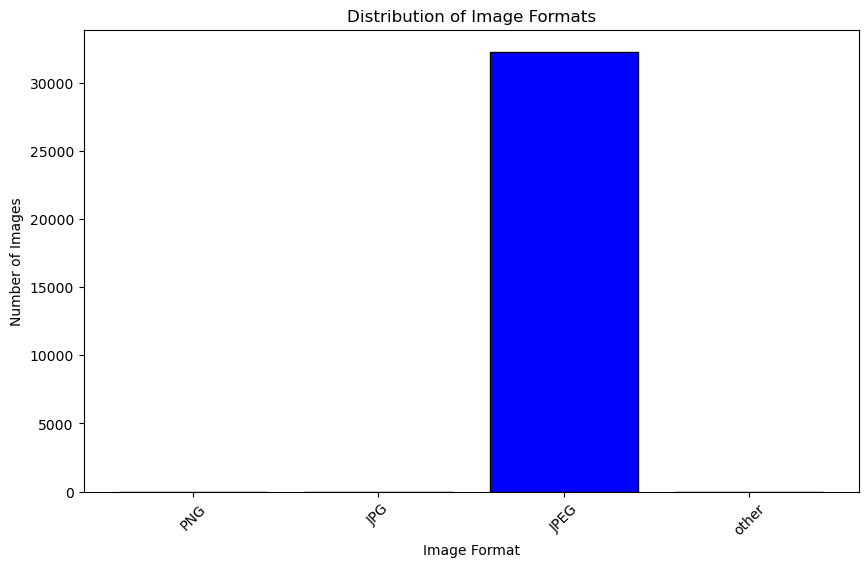

In [11]:
check_file_types()

### 2.4 Bildgrößen und Auflösungen
Die Verteilung der Bildbreiten und -höhen wurde visualisiert, um ein besseres Verständnis der Größenverteilung innerhalb des Datensatzes zu erlangen. Diese Information ist entscheidend für die Entscheidung über die Bildskalierung und -normalisierung in späteren Schritten der Datenvorverarbeitung.

In [12]:
image_sizes = set()

for folder, data in folder_image_data.items():
    for img_data in data['images']:
        img = img_data['image']
        size = img.size
        image_sizes.add(size)


unique_sizes = list(image_sizes)

print("Unique Image Sizes:", unique_sizes)
logger.info(f"Unique Image Sizes: {unique_sizes}")

2024-09-04 16:47:31 - INFO - Unique Image Sizes: [(100, 100), (120, 120)]


Unique Image Sizes: [(100, 100), (120, 120)]


### 2.5 Plotte ein Bild aus jedem Ordner
Ein visueller Eindruck des Datensatzes wurde durch das Anzeigen von Beispielbildern aus jedem Ordner gewonnen.

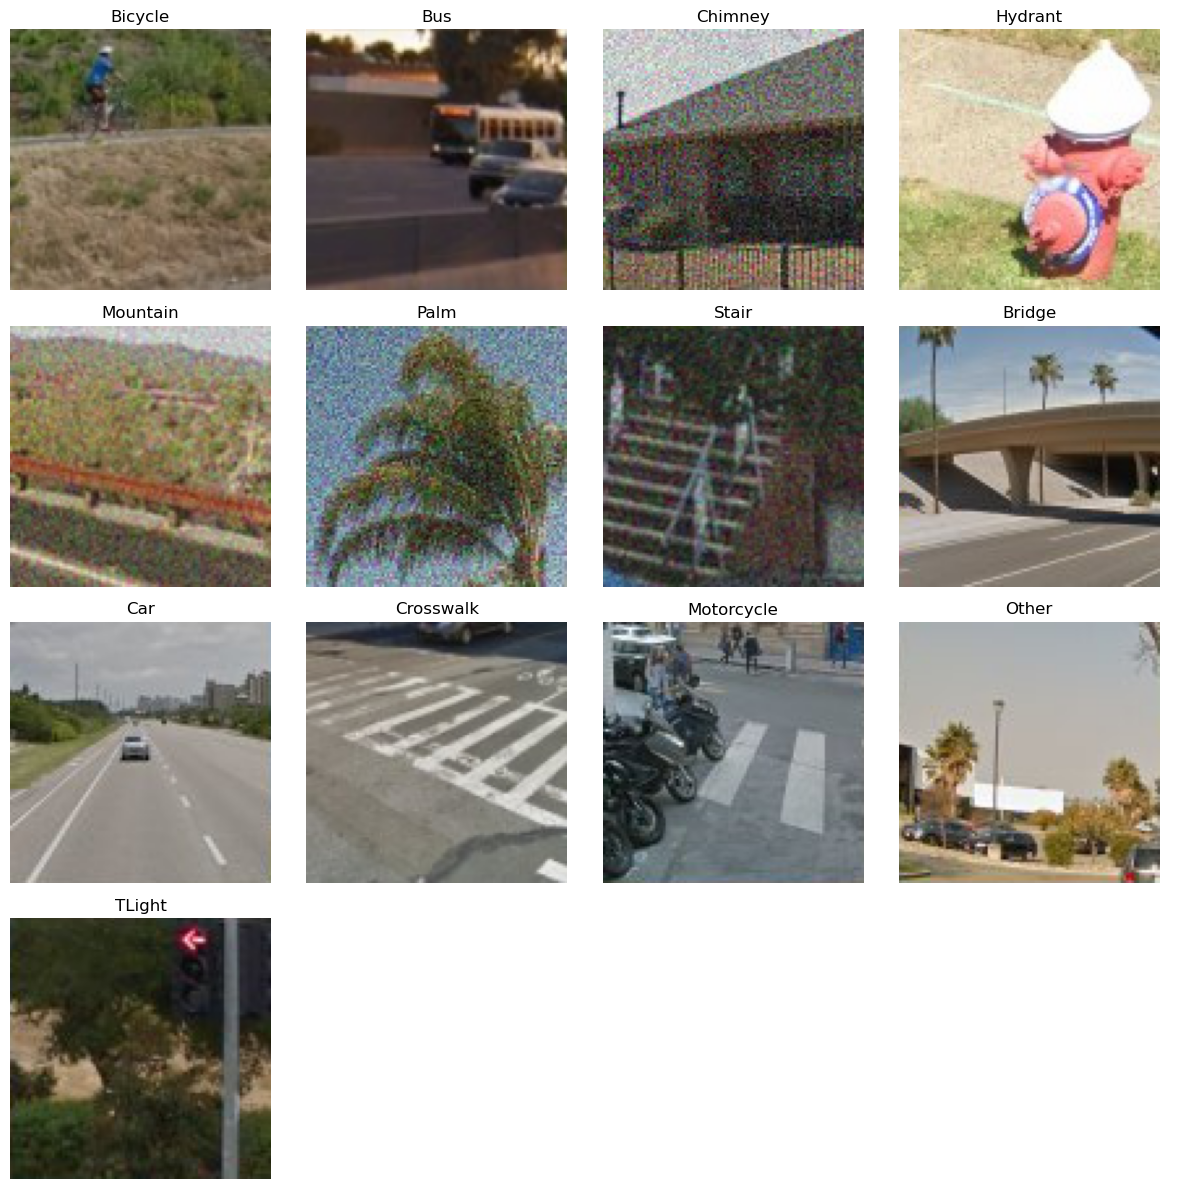

In [13]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(4, 4, figsize=(12, 12))
count = 0
axes = axes.flatten()

for folder, data in folder_image_data.items():
    if count >= 16:
        break

    images = data['images']
    if images:
        img_dict = images[0]
        img = img_dict['image']
        axes[count].imshow(img)
        axes[count].set_title(folder)
        axes[count].axis('off')
        count += 1

for i in range(count, 16):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

### 2.6 Zusammenfassung und Schlussfolgerungen der EDA

**Erkenntnisse**

Verteilung der Bildanzahlen: Die meisten Bilder sind in der Kategorie „Car“ vorhanden, was möglicherweise darauf hinweist, dass diese Kategorie am häufigsten vorkommt oder für die reCAPTCHA-Herausforderungen am wichtigsten ist.

Kategorien mit wenig Bildern: Kategorien wie „Mountain“ haben nur sehr wenige Bilder, was zu einer Ungleichheit in der Datenmenge führen kann.

Mögliche Anomalien: Kategorien wie „Mountain“ könnten als mögliche Anomalien betrachtet werden, die weitere Aufmerksamkeit erfordern.

**Empfehlungen**

Datenbalance: Eine Datenbalancierung könnte notwendig sein, um sicherzustellen, dass das Modell gleichmäßig über alle Kategorien trainiert wird.

Weitere Datensammlung: Für Kategorien mit wenigen Bildern könnten zusätzliche Daten gesammelt werden, um die Modellleistung zu verbessern.

## 3. Erstellen eines Trainingsdatensatzes

Das Ziel dieses Abschnitts ist die Erzeugung eines Datensatzes, welcher für die maschinelle Verarbeitung geeignet ist.

### 3.1 Konfiguration der Experimentparameter

Zur besseren Lesbarkeit und Wartbarkeit wurden Datenvorbereitung-, Training- und Modellauswahl-Parameter generalisiert und an einer zentralen Stelle definiert.

In [14]:
import tensorflow as tf
from tensorboard.plugins.hparams import api as hp
import time

log_dir = f'../logs/captcha-{time.strftime("%d.%m.%Y %H:%M:%S", time.localtime())}/'
model_dir = f'../models/{time.strftime("%d.%m.%Y %H:%M:%S", time.localtime())}/' + 'model-{epoch:02d}-{val_loss:.2f}.keras'
logger.info(f"save logs to: '{log_dir}'")
logger.info(f"save models to: '{model_dir}'")

HP_DATA_ZOOM = hp.HParam('data_zoom', hp.RealInterval(-1.0, 1.0)) 
HP_DATA_CONTRAST = hp.HParam('data_contrast', hp.RealInterval(-1.0, 1.0)) 
HP_DATA_BRIGHTNESS_LOW = hp.HParam('data_brightness_low', hp.RealInterval(-1.0, 1.0)) 
HP_DATA_BRIGHTNESS_UP = hp.HParam('data_brightness_up', hp.RealInterval(-1.0, 1.0)) 
HP_DATA_FLIP = hp.HParam('data_flip', hp.Discrete([True, False])) 

HP_TRAINING_LEARNING_RATE = hp.HParam('learning_rate', hp.RealInterval(0.001, 0.1))
HP_TRAINING_LOSS = hp.HParam('loss', hp.Discrete(['categorical_crossentropy']))
HP_TRAINING_OPTIMIZER = hp.HParam('optimizer', hp.Discrete(['adam', 'sgd']))
HP_TRAINING_EPOCHS = hp.HParam('epochs', hp.IntInterval(1, 10))

HP_MODEL_SELECTION = hp.HParam('model', hp.Discrete(['resnet50v2', 'inceptionv3', 'leNet5']))

2024-09-04 16:47:40 - INFO - save logs to: '../logs/captcha-04.09.2024 16:47:40/'
2024-09-04 16:47:40 - INFO - save models to: '../models/04.09.2024 16:47:40/model-{epoch:02d}-{val_loss:.2f}.keras'


In [15]:

hparams = {
    HP_DATA_ZOOM: 0.05,
    HP_DATA_CONTRAST: 0.05,
    HP_DATA_BRIGHTNESS_LOW: -0.05,
    HP_DATA_BRIGHTNESS_UP: 0.05, 
    HP_DATA_FLIP: True,

    HP_TRAINING_LEARNING_RATE: 0.001,
    HP_TRAINING_LOSS: 'categorical_crossentropy',
    HP_TRAINING_OPTIMIZER: 'adam',
    HP_TRAINING_EPOCHS: 10,

    HP_MODEL_SELECTION: 'leNet5'
}
with tf.summary.create_file_writer(log_dir).as_default():
    hp.hparams(hparams)

2024-09-04 16:47:40.590462: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-09-04 16:47:40.590485: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-09-04 16:47:40.590493: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-09-04 16:47:40.590510: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-04 16:47:40.590525: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


### 3.2 Daten augumentieren


Die Frage, wie stark man Daten durch Augmentierung erhöhen sollte, ist ein wichtiger Forschungsbereich im maschinellen Lernen. Die Praxis, Datenklassen auf ähnliche Größenordnungen zu bringen, basiert auf dem Bedürfnis, das Modell vor Überanpassung an eine bestimmte Klasse zu schützen und sicherzustellen, dass alle Klassen ausreichend repräsentiert sind. Es gibt jedoch verschiedene Studien und Richtlinien, die aufzeigen, dass eine signifikante Augmentierung sinnvoll sein kann:

Studien zur Verbesserung der Klassifikationsleistung durch Datenaugmentierung:

Wong et al. (2016) in ihrem Paper "Understanding Data Augmentation for Classification" zeigen, dass Augmentierung insbesondere bei kleinen Datensätzen die Generalisierungsfähigkeit eines Modells erheblich verbessern kann. Sie heben hervor, dass selbst drastische Erhöhungen der Datenmenge durch Augmentierung (um das 10- bis 100-fache) bei unterrepräsentierten Klassen zu einer verbesserten Leistung führen können.
Perez und Wang (2017) in "The Effectiveness of Data Augmentation in Image Classification using Deep Learning" analysieren den Effekt von Datenaugmentierung in verschiedenen Szenarien und finden heraus, dass eine drastische Erhöhung der Anzahl von Trainingsbeispielen durch Augmentierung zu einer signifikant besseren Leistung führen kann, insbesondere wenn die Augmentierungen realistische Varianten der Bilder erzeugen.
Balance von Klassen:

Buda, Maki, und Mazurowski (2018) in ihrem Paper "A Systematic Study of the Class Imbalance Problem in Convolutional Neural Networks" untersuchen die Auswirkungen von Klassenungleichgewichten und zeigen, dass ein Ausgleich der Klassenverteilung durch Datenaugmentierung oder andere Techniken entscheidend ist, um die Performance eines Modells zu verbessern. Sie betonen, dass eine zu große Diskrepanz in der Klassenverteilung zu einer schlechteren Modellleistung führt.
Praktische Leitlinien:

Die Praxis der "Over-Sampling"-Technik durch Augmentierung (bei der unterrepräsentierte Klassen stark augmentiert werden) ist eine weit verbreitete Methode, um Klassifikationsmodelle robuster zu machen. Es gibt keine festgelegte Grenze für das "Wie viel", aber es ist üblich, die kleineren Klassen auf eine ähnliche Größe wie die größeren zu bringen, um ein ausgewogenes Training zu ermöglichen.

#### 3.2.1 Augmentierung der Daten durch Zoom, Kontrast, Helligkeit und vertikale Spiegelung

##### 3.2.1.1 Definition der Augmentierungspipeline

In [16]:
import numpy as np
import tensorflow as tf

def augmentation_pipeline(zoom:float = hparams[HP_DATA_ZOOM], 
                          contrast:float = hparams[HP_DATA_CONTRAST], 
                          brightness:list = [hparams[HP_DATA_BRIGHTNESS_LOW],hparams[HP_DATA_BRIGHTNESS_UP]],
                          flip: bool = hparams[HP_DATA_FLIP]):

    if hparams[HP_DATA_FLIP]:
        logger.info(f"Augmentation Parameter: Zoom - {zoom}, Contrast - {contrast}, Brightness - {brightness}, Flip - {flip}")
        data_augmentation = tf.keras.Sequential([
            tf.keras.layers.RandomZoom(height_factor=zoom, seed=42),
            tf.keras.layers.RandomContrast(factor=contrast, seed=42),
            tf.keras.layers.RandomBrightness(factor=brightness, seed=42),
            tf.keras.layers.RandomFlip(mode='horizontal', seed=42), 
        ])
    else:
        logger.info(f"Augmentation Parameter: Zoom - {zoom}, Contrast - {contrast}, Brightness - {brightness}, Flip - {flip}")
        data_augmentation = tf.keras.Sequential([
            tf.keras.layers.RandomZoom(height_factor=zoom, seed=42),
            tf.keras.layers.RandomContrast(factor=contrast, seed=42),
            tf.keras.layers.RandomBrightness(factor=brightness, seed=42),
        ])
    return data_augmentation

def augment_images(folder:str, folder_data, target_count):
    
    current_count = folder_data['count']
    images = folder_data['images']
    if folder == "Mountain":
        data_augmentation = augmentation_pipeline(contrast=0.025, brightness=[-0.025,0.025])
    else:
        data_augmentation = augmentation_pipeline()

    while current_count < target_count:
        for img_dict in images:
            img = img_dict['image']
            img_array = np.array(img.convert('RGB'))

            img_augmented = data_augmentation(tf.expand_dims(img_array, 0))
            img_augmented = tf.squeeze(img_augmented).numpy().astype("uint8")

            img_augmented_pil = Image.fromarray(img_augmented)

            images.append({'image': img_augmented_pil})
            current_count += 1

            if current_count >= target_count:
                break

    folder_data['count'] = current_count
    folder_data['images'] = images

In [20]:
for folder, data in folder_image_data.items():
    logger.info(f"Augmenting class: {folder}")
    target_count = 2000
    if data['count'] < target_count:
        augment_images(folder, data, target_count)

for folder, data in folder_image_data.items():
    print(f"{folder} now has {data['count']} images.")

2024-09-04 16:50:13 - INFO - Augmenting class: Bicycle
2024-09-04 16:50:13 - INFO - Augmenting class: Bus
2024-09-04 16:50:13 - INFO - Augmenting class: Chimney
2024-09-04 16:50:13 - INFO - Augmenting class: Hydrant
2024-09-04 16:50:13 - INFO - Augmenting class: Mountain
2024-09-04 16:50:13 - INFO - Augmentation Parameter: Zoom - 0.05, Contrast - 0.025, Brightness - [-0.025, 0.025], Flip - True
2024-09-04 16:51:13 - INFO - Augmenting class: Palm
2024-09-04 16:51:13 - INFO - Augmentation Parameter: Zoom - 0.05, Contrast - 0.05, Brightness - [-0.05, 0.05], Flip - True
2024-09-04 16:51:22 - INFO - Augmenting class: Stair
2024-09-04 16:51:22 - INFO - Augmentation Parameter: Zoom - 0.05, Contrast - 0.05, Brightness - [-0.05, 0.05], Flip - True
2024-09-04 16:52:06 - INFO - Augmenting class: Bridge
2024-09-04 16:52:06 - INFO - Augmentation Parameter: Zoom - 0.05, Contrast - 0.05, Brightness - [-0.05, 0.05], Flip - True
2024-09-04 16:52:31 - INFO - Augmenting class: Car
2024-09-04 16:52:31 - I

Bicycle now has 2000 images.
Bus now has 7166 images.
Chimney now has 2000 images.
Hydrant now has 6009 images.
Mountain now has 2000 images.
Palm now has 2000 images.
Stair now has 2000 images.
Bridge now has 2000 images.
Car now has 6123 images.
Crosswalk now has 2056 images.
Motorcycle now has 2000 images.
Other now has 2614 images.
TLight now has 2802 images.


##### 3.2.1.2 Demonstration der Augmentierung

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(4, 4, figsize=(12, 12))
count = 0
axes = axes.flatten()

data_augmentation = augmentation_pipeline()

for folder, data in folder_image_data.items():
    if count >= 16:
        break
    images = data['images']

    if images:
        img_dict = images[0]
        img = img_dict['image']
        img_array = np.array(img.convert('RGB'))

        axes[count].imshow(img_array)
        axes[count].set_title(f"Original: {folder}")
        axes[count].axis('off')
        count += 1

        img_augmented = data_augmentation(tf.expand_dims(img_array, 0))
        img_augmented = tf.squeeze(img_augmented).numpy().astype("uint8")

        axes[count].imshow(img_augmented)
        axes[count].set_title(f"Augmented: {folder}")
        axes[count].axis('off')
        count += 1

for i in range(count, 16):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

Besondere Untersuchung der Klasse *Mountain* um die Auswirkungen der Augmentierung visuell zu beurteilen

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

mountain_images = folder_image_data['Mountain']['images']
random.shuffle(mountain_images)
selected_images = mountain_images[:81] 

fig, axes = plt.subplots(9, 9, figsize=(20, 20)) 
axes = axes.flatten()

for i, img_dict in enumerate(selected_images):
    img = img_dict['image']
    img_array = np.array(img.convert('RGB'))
    axes[i].imshow(img_array)
    axes[i].axis('off')

for i in range(len(selected_images), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# raise Exception("stop")

#### 3.2.2 Datensatz in einem temporären Ordner speichern

In [ ]:
import os
import shutil
import tempfile
from PIL import Image
import matplotlib.pyplot as plt

temp_dir = tempfile.mkdtemp()
try:
    for folder, data in folder_image_data.items():
        folder_path = os.path.join(temp_dir, folder)
        os.makedirs(folder_path, exist_ok=True)

        for i, img_dict in enumerate(data['images']):
            img = img_dict['image']
            img_rgb = img.convert('RGB')

            img_path = os.path.join(folder_path, f'image_{i}.jpg')
            img_rgb.save(img_path, format='JPEG')

    for root, dirs, files in os.walk(temp_dir):
        level = root.replace(temp_dir, '').count(os.sep)
        indent = ' ' * 4 * level

        subindent = ' ' * 4 * (level + 1)
        for f in files:
            img_path = os.path.join(root, f)
            with Image.open(img_path) as img:
                width, height = img.size

    fig, axes = plt.subplots(4, 4, figsize=(12, 12))

    count = 0
    axes = axes.flatten()
    for folder in os.listdir(temp_dir):
        if count >= 16:
            break
        folder_path = os.path.join(temp_dir, folder)
        if os.path.isdir(folder_path):
            img_files = os.listdir(folder_path)
            if img_files:
                img_path = os.path.join(folder_path, img_files[0])
                img = Image.open(img_path)
                axes[count].imshow(img)
                axes[count].set_title(folder)
                axes[count].axis('off')
                count += 1

    for i in range(count, 16):
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

except:
  print("Error")

### 3.3 Datensatz erzeugen mithilfe Keras Bibliotheken

Anhand der zur Verfügung stehenden Keras function ```image_dataset_from_directory``` ist es möglich, einfach aus dem bestehenden vorverarbeiteten Bilderverzeichnis zwei in Zahlen kodierte Datensätze zu erzeugen.

Mittels dessen Funktionsparameter kann unmittelbar eine Größenanpassung auf 120x120 Pixel und eine Bündelung in Stapel (Batches) je 64 Bildtensoren durchgeführt werden.

Die Erkennung des Klasse eines Bildes erfolgt aus der Verortung in ihrem zugehörigen Klassenordner.

Eine Klassenbezeichnung im Datensatz wird kategorisch, also als 13-dimensionaler Tensor mit binärer Ausprägung an entsprechender Stelle definiert.

In [ ]:
import tensorflow as tf

try:
    train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
        temp_dir,
        labels="inferred",
        label_mode="categorical",
        class_names=None,
        color_mode="rgb",
        batch_size=64,
        image_size=(120, 120),
        shuffle=True,
        seed=42,
        validation_split=0.2,
        subset='training',
        interpolation="bilinear",
        follow_links=False,
        crop_to_aspect_ratio=False,
        pad_to_aspect_ratio=False,
        data_format='channels_last',
        verbose=True
    )

    validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
        temp_dir,
        labels="inferred",
        label_mode="categorical",
        class_names=None,
        color_mode="rgb",
        batch_size=64,
        image_size=(120, 120),
        shuffle=True,
        seed=42,
        validation_split=0.2,
        subset='validation',
        interpolation="bilinear",
        follow_links=False,
        crop_to_aspect_ratio=False,
        pad_to_aspect_ratio=False,
        data_format='channels_last',
        verbose=True
    )

    print(f"training dataset contains {len(train_dataset)} Batches")
    print(f"testing dataset contains {len(validation_dataset)} Batches")

    for element in train_dataset:
        print(f"shape X_train: {element[0].shape}")
        print(f"shape Y_train: {element[1].shape}")
        break

finally:
    logger.info("Successfully created training and validation dataset")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def show_class_images(dataset):
  category_images = {}
  class_names = dataset.class_names
  for images, labels in dataset:
          for img, label in zip(images, labels):
              category = class_names[np.argmax(label)]
              if category not in category_images:
                  category_images[category] = img.numpy()
              if len(category_images) == len(class_names):
                  break
          if len(category_images) == len(class_names):
              break

  num_categories = len(category_images)
  fig, axes = plt.subplots(1, num_categories, figsize=(15, 5))
  for ax, (category, img) in zip(axes, category_images.items()):
          ax.imshow(img.astype("uint8"))
          ax.set_title(category)
          ax.axis("off")

  plt.tight_layout()
  plt.show()

show_class_images(validation_dataset)

In [ ]:
show_class_images(train_dataset)

## 4. Entwicklung und Optimierung von neuronalen Netzarchitekturen

### 4.1 Überprüfung der GPU Unterstützung

In [ ]:
import sys
import tensorflow as tf
from tensorflow import keras as keras
import platform

print(f"Python Platform: {platform.platform()}")
print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {keras.__version__}")
print()
print(f"Python {sys.version}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")

### 4.2 Überwachung der Trainingsprozesse

In [ ]:
import tensorflow.keras as keras
from keras.callbacks import TensorBoard, ModelCheckpoint, ProgbarLogger, CSVLogger

tensorboard_callback = TensorBoard(
    log_dir=log_dir,
    histogram_freq=1,
    update_freq='epoch',
    write_graph=True)

checkpoint_callback = ModelCheckpoint(
    filepath=model_dir,
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose =1)

progressbar_callback = ProgbarLogger()

csv_callback = CSVLogger(log_dir + 'logs.csv')

callbacks= [tensorboard_callback,
            checkpoint_callback,
            progressbar_callback,
            csv_callback]

### 4.3 Erstellung verschiedener neuronaler Netzarchitekturen

#### 4.3.1 ResNet

In [ ]:
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout

base = keras.applications.ResNet50V2(
    include_top=False, 
    weights='imagenet',
    input_shape=(120, 120, 3),
    name='resnet50v2')

resnet50v2 = Sequential()
resnet50v2.add(base)
resnet50v2.add(Dropout(0.2))
resnet50v2.add(Flatten())
resnet50v2.add(Dense(13, activation='softmax'))

resnet50v2.summary()

#### 4.3.2 InceptionV3

In [ ]:
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout


base = keras.applications.InceptionV3(
    include_top=False,
    weights="imagenet",
    input_shape=(120, 120, 3),
    name="inception_v3",
)

inceptionv3 = Sequential()
inceptionv3.add(base)
inceptionv3.add(Dropout(0.2))
inceptionv3.add(Flatten())
inceptionv3.add(Dense(13, activation='softmax'))

inceptionv3.summary()

#### 4.3.3 LeNet5

In [ ]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, AveragePooling2D 
leNet5 = Sequential()
leNet5.add(Conv2D(filters=6, strides=1, kernel_size=(5, 5), activation='relu', input_shape=(120, 120, 3)))
leNet5.add(AveragePooling2D(strides=2, pool_size=(2, 2)))
leNet5.add(Conv2D(filters=16, strides=1, kernel_size=(5, 5), activation='relu',))
leNet5.add(AveragePooling2D(strides=2, pool_size=(2, 2)))
leNet5.add(Flatten())
leNet5.add(Dense(13, activation='softmax'))
leNet5.summary()

### 4.4 Trainingsprozess

Folgend wird basierend auf den Experimentparametern das zuvordefinierte Modell als aktuelles Trainingsmodell gesetzt.

In [ ]:
model = globals()[hparams[HP_MODEL_SELECTION]]
logger.info(f"Selected model: {hparams[HP_MODEL_SELECTION]}")

In [ ]:
from tensorflow.keras import metrics

model.compile(optimizer=hparams[HP_TRAINING_OPTIMIZER],
              loss=hparams[HP_TRAINING_LOSS],
              metrics=[
                  metrics.CategoricalAccuracy(name = 'accuracy'),
                  metrics.Precision(name = 'precision'),
                  metrics.Recall(name = 'recall'),
                  metrics.AUC(name = 'auc')
              ])

In [ ]:
model.fit(train_dataset, epochs=hparams[HP_TRAINING_EPOCHS], validation_data=validation_dataset, callbacks=callbacks)

## 5. Evaluation und Bewertung der Optimierungsprozesse